<a href="https://colab.research.google.com/github/sreenivasulureddy91/melbourne-housing-market/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.74 s (started: 2022-04-09 02:31:28 +00:00)


In [ ]:
import pandas as pd
import numpy as np

time: 2.4 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/INT247/Melbourne_housing_FULL (2).csv')

time: 123 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


time: 27.7 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df.shape

(34857, 21)

time: 2.89 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df.select_dtypes(['object']).columns


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

time: 10.8 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    df[colname] = df[colname].astype('category')  

time: 81.9 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

time: 15.9 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


time: 91.5 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
num_cats = ['Postcode']  # Convert numeric variables to categorical

for colname in num_cats:
    df[colname] = df[colname].astype('category')   


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [ ]:
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']


time: 2.33 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,0.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,0.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


time: 64.8 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df= df.drop(['Bedroom2','Rooms v Bedroom2'],1)


time: 9.69 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
# Add age variable
df['Age'] = 2017 - df['YearBuilt']

# Identify historic homes
df['Historic'] = np.where(df['Age']>=50,'Historic','Contemporary')

# Convert to Category
df['Historic'] = df['Historic'].astype('category')

time: 20.2 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

In [ ]:
df.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
Age              19306
Historic             0
dtype: int64

time: 14.9 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
Age              55.386293
Historic          0.000000
dtype: float64

time: 13.7 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df = df.dropna()

time: 13.7 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         8887 non-null   category      
 1   Address        8887 non-null   category      
 2   Rooms          8887 non-null   int64         
 3   Type           8887 non-null   category      
 4   Price          8887 non-null   float64       
 5   Method         8887 non-null   category      
 6   SellerG        8887 non-null   category      
 7   Date           8887 non-null   datetime64[ns]
 8   Distance       8887 non-null   float64       
 9   Postcode       8887 non-null   category      
 10  Bathroom       8887 non-null   float64       
 11  Car            8887 non-null   float64       
 12  Landsize       8887 non-null   float64       
 13  BuildingArea   8887 non-null   float64       
 14  YearBuilt      8887 non-null   float64       
 15  CouncilArea    8887 

In [ ]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
Historic         0
dtype: int64

time: 11 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
 # EDA

time: 843 µs (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

time: 3.36 ms (started: 2022-04-09 02:31:31 +00:00)


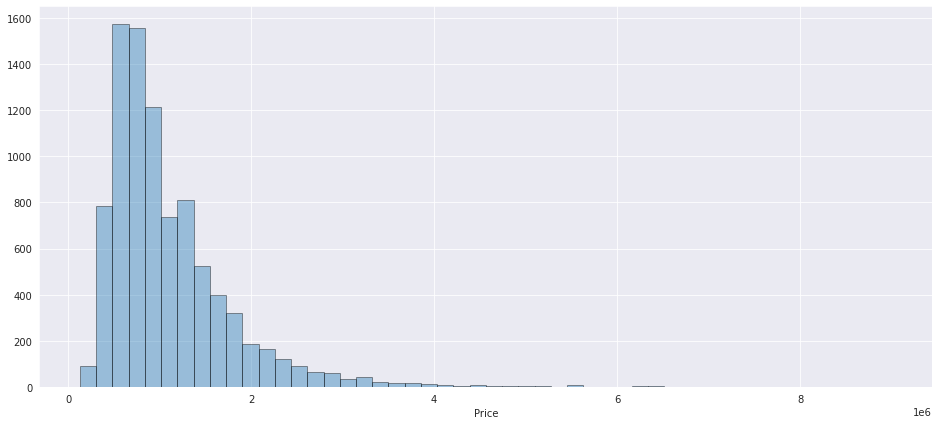

time: 407 ms (started: 2022-04-09 02:31:31 +00:00)


In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df['Price'], kde = False,hist_kws=dict(edgecolor="k"))

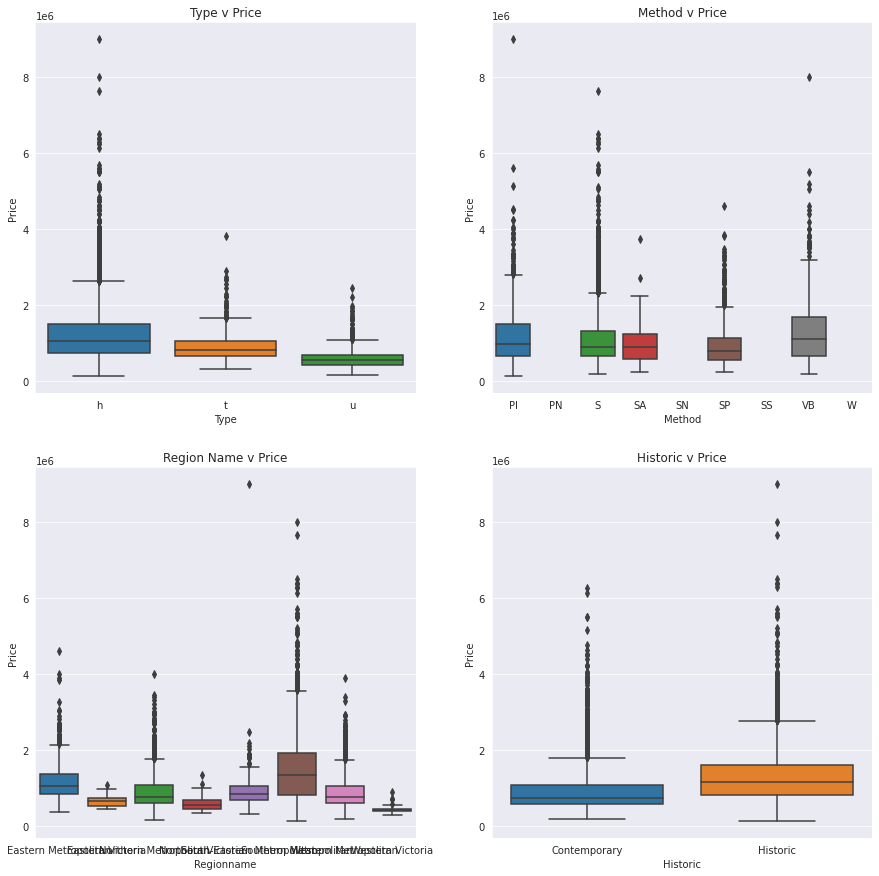

time: 1.15 s (started: 2022-04-09 02:31:32 +00:00)


In [ ]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

In [ ]:
df.select_dtypes(['float64','int64']).columns


Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

time: 7.3 ms (started: 2022-04-09 02:31:33 +00:00)


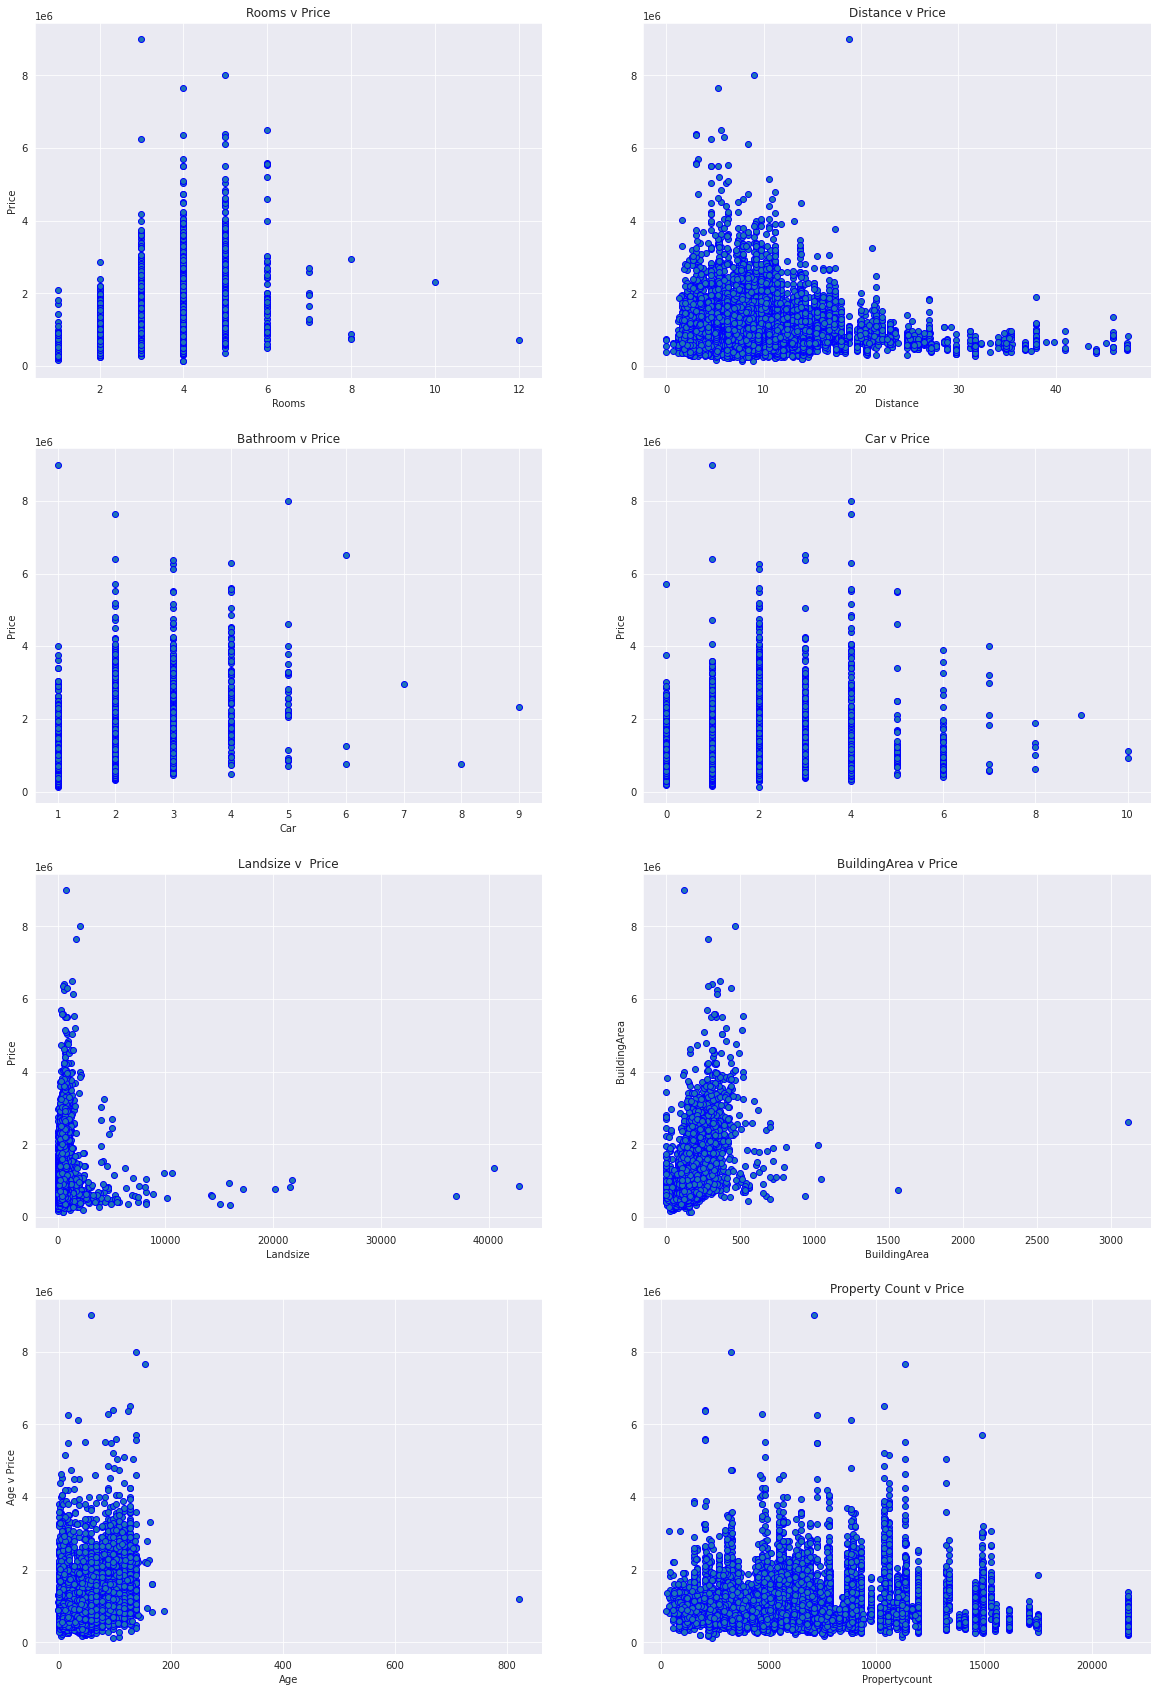

time: 2.4 s (started: 2022-04-09 02:31:33 +00:00)


In [ ]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

axes[3,0].scatter(x = 'Age', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

Text(0.5, 1.0, 'Variable Correlation')

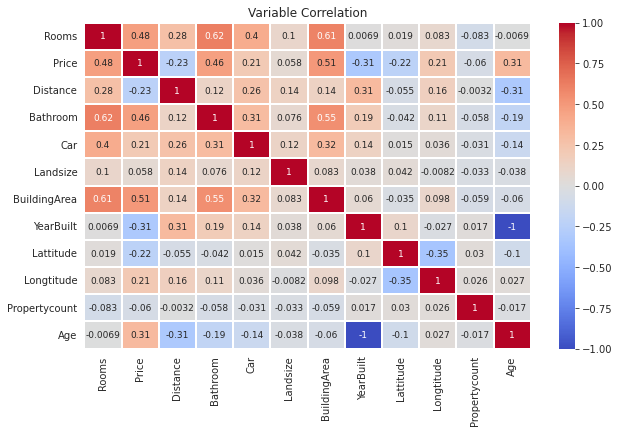

time: 1.04 s (started: 2022-04-09 02:31:35 +00:00)


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [ ]:
X =df[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

# Create target variable
y = df['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

time: 13.1 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
X_train.describe()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Age
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000
mean,3.113518,11.257378,1.653960,1.697426,529.301590,149.811853,7512.721058,51.097060
std,0.969236,6.847894,0.724282,0.973637,1136.021223,82.429067,4388.724395,36.166405
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,249.000000,-2.000000
25%,3.000000,6.400000,1.000000,1.000000,216.000000,100.000000,4387.000000,17.000000
50%,3.000000,10.300000,2.000000,2.000000,482.000000,132.600000,6567.000000,47.000000
75%,4.000000,13.900000,2.000000,2.000000,653.000000,181.000000,10331.000000,72.000000
max,12.000000,47.400000,9.000000,10.000000,42800.000000,1561.000000,21650.000000,187.000000


time: 41.2 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

time: 1.54 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
X_train_sc=sc.fit_transform(X_train)

time: 9.98 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
pd.DataFrame(X_train_sc).describe()

,0,1,2,3,4,5,6,7
count,7.109000e+03,7.109000e+03,7.109000e+03,7.109000e+03,7.109000e+03,7.109000e+03,7.109000e+03,7.109000e+03
mean,-4.110687e-16,1.492999e-16,-2.757988e-17,1.683060e-16,6.830062e-18,-2.079111e-16,7.080815e-17,6.545927e-17
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.180755e+00,-1.644034e+00,-9.029718e-01,-1.743509e+00,-4.659586e-01,-1.817592e+00,-1.655204e+00,-1.468235e+00
25%,-1.171294e-01,-7.093742e-01,-9.029718e-01,-7.163603e-01,-2.758079e-01,-6.043421e-01,-7.122664e-01,-9.428490e-01
50%,-1.171294e-01,-1.398160e-01,4.778040e-01,3.107888e-01,-4.164087e-02,-2.088227e-01,-2.155040e-01,-1.132916e-01
75%,9.146833e-01,3.859300e-01,4.778040e-01,3.107888e-01,1.088951e-01,3.783901e-01,6.422087e-01,5.780063e-01
max,9.169185e+00,5.278289e+00,1.014323e+01,8.527982e+00,3.721204e+01,1.712123e+01,3.221499e+00,3.757976e+00


time: 50.5 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_sc,y_train)

LinearRegression()

time: 19.1 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
y_pred = regressor.predict(X_test)


time: 14.6 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
regressor.score(X_train_sc,y_train)

0.5431593691538834

time: 14.9 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
regressor.score(X_test,y_test)

-3835.0844034333745

time: 15.6 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

MAE: 31775099.82723592
MSE: 1892136087894517.0
RMSE: 43498690.64574837
R^2 = -2531.285364173991
time: 6.38 ms (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_sc,y_train)

LogisticRegression()

time: 2min 6s (started: 2022-04-09 02:31:37 +00:00)


In [ ]:
train_pred_lr=lr.predict(X_train_sc)
test_pred_lr=lr.predict(X_test)

time: 131 ms (started: 2022-04-09 02:33:43 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score

time: 1.13 ms (started: 2022-04-09 02:33:43 +00:00)


In [ ]:
print("Training Accuracy :",accuracy_score(y_train,train_pred_lr))
print("Testing Accuracy :",accuracy_score(y_test,test_pred_lr))

Training Accuracy : 0.03094668729779153
Testing Accuracy : 0.0
time: 5.43 ms (started: 2022-04-09 02:33:43 +00:00)


In [ ]:
y_pred_lr=lr.predict(X_test)

time: 43.9 ms (started: 2022-04-09 02:33:43 +00:00)


In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_lr))

MAE: 467721.05793025874
MSE: 594889468459.3876
RMSE: 771290.7807431563
R^2 = -2.220446049250313e-16
time: 12.6 ms (started: 2022-04-09 02:33:43 +00:00)


In [ ]:
from sklearn. svm import SVC
svc=SVC()
svc.fit(X_train_sc,y_train)

SVC()

time: 16.4 s (started: 2022-04-09 02:33:43 +00:00)


In [ ]:
y_pred_svm=lr.predict(X_test)

time: 32.6 ms (started: 2022-04-09 02:34:00 +00:00)


In [ ]:
train_pred_svc=svc.predict(X_train_sc)
test_pred_svc=svc.predict(X_test)

time: 5min 41s (started: 2022-04-09 02:34:00 +00:00)


In [ ]:
print("Training accuracy :",accuracy_score(train_pred_svc,y_train))
print("Testing accuracy:",accuracy_score(test_pred_svc,y_test))

Training accuracy : 0.04627936418624279
Testing accuracy: 0.00843644544431946
time: 6.21 ms (started: 2022-04-09 02:39:41 +00:00)


In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_svm))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_svm))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_svm)))
print('R^2 =',metrics.explained_variance_score(y_test,y_pred_svm))

MAE: 467721.05793025874
MSE: 594889468459.3876
RMSE: 771290.7807431563
R^2 = -2.220446049250313e-16
time: 9.74 ms (started: 2022-04-09 02:39:41 +00:00)


In [ ]:
from sklearn.ensemble import VotingClassifier

time: 205 ms (started: 2022-04-09 02:39:41 +00:00)


In [ ]:
vc=VotingClassifier(estimators=[('logistic',lr),('support',svc)],voting='hard')

time: 1.56 ms (started: 2022-04-09 02:39:41 +00:00)


In [ ]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('support', SVC())])

time: 1min 43s (started: 2022-04-09 02:39:41 +00:00)


In [ ]:
train_pred_vc=vc.predict(X_train_sc)
test_pred_vc=vc.predict(X_test)


time: 6min 22s (started: 2022-04-09 02:41:25 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score

time: 1.78 ms (started: 2022-04-09 02:47:48 +00:00)


In [ ]:
print("Training accuracy :",accuracy_score(train_pred_vc,y_train))
print("Testing accuracy:",accuracy_score(test_pred_vc,y_test))

Training accuracy : 0.011675341116894078
Testing accuracy: 0.007874015748031496
time: 9.82 ms (started: 2022-04-09 02:47:48 +00:00)
